<a href="https://colab.research.google.com/github/joe-hannes/DAIS/blob/main/week3/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Decision Trees II

With this task, we want to explore how to program decision trees in Python. We will use some popular packages and libraries that are specifically developed for this machine learning method, but also manually design some of the functions needed to set up a decision tree classifier ourselves. 

Before you start working on this task, check out the [Tree](https://scikit-learn.org/stable/modules/tree.html) module from the [Scikit-Learn](https://scikit-learn.org/stable/index.html) library and get familiar with some functions this module provides.

If you haven't installed the correct version 0.24.1 of scikit-learn yet, just run the following line of code to properly install it on your machine.

In [ ]:
!pip install scikit-learn==0.24.1

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## 2.1 Obtaining the **Iris Plants** dataset
Let's use another interesting dataset this time: The [Iris Plants Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset) provided by scikit-learn is used to classify three different types of iris flower. Similar to the Boston Housing Prices dataset, this one is fully preprocessed and ready for analyzing.

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
features = iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
classes = iris.target_names
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So as you can see, the class names are the Latin names for each type of iris flower. But let's continue by taking a look at the dataset description:

In [ ]:
print(iris.DESCR)
print(iris.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 2.2 Automated Decision Tree Classification
We can now get the DecisionTreeClassifier and train it on our feature and target values.

In [ ]:
from sklearn import tree
X, y = iris.data, iris.target
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dt = dt.fit(X, y)

Awesome, now it's time to plot our tree:

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue

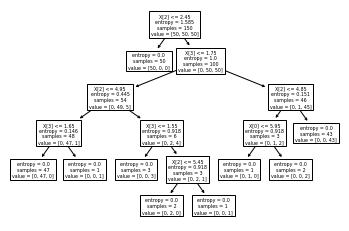

In [ ]:
tree.plot_tree(dt)

This doesn't look too good. We need a bigger figure size and don't want to see this unreadable text. So let's use ```matplotlib``` to adjust the size of the plot and enter some parameters to the ```plot_tree()``` function:

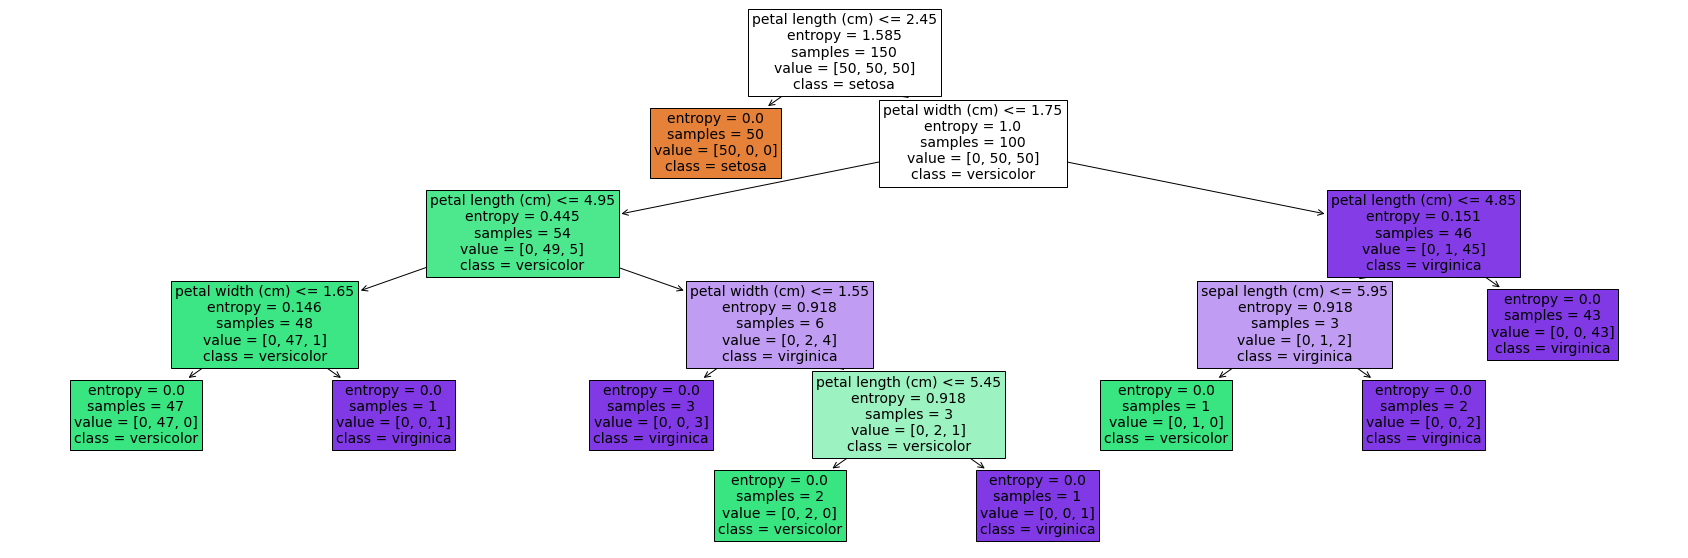

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
_ = tree.plot_tree(dt, feature_names=features, class_names=classes, filled=True, fontsize=14)

By the way ```filled=True``` as described in the ```plot_tree``` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) is responsible for coloring the decision tree according to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

So now we know how to automatically create a decision tree using existing Python libraries. But since we still haven't taken a look behind the curtains of such automated functions, we want to write some decision tree classifier ourselves.

## 2.3 Attribute Splitting with ID3 Algorithm

In the lecture, you got to know two criteria for attribute split, i.e. information gain (entropy) and gini impurity. Now it's time to write some functions that determine the next attribute to split on according to the entropy criterion. **Your part will be to implement the four helper functions below**.

The first function ```entropy(...)``` takes an array of values (usually labels) and outputs the entropy (or _info_).

In [6]:
# eugens mapreducer lässt grüßen :D


# def get_unique_items(value_arr):
#     sorted_arr = np.sort(value_arr)
#     omegalul = len(sorted_arr)
#     k = 0
#     A=[0]

#     print(sorted_arr)
#     for i in range(omegalul-1):
#       # last_value = sorted_arr[i]

#       if i == 0:
#         A[k] += 1
#       print(i)

#       if sorted_arr[i] == sorted_arr[i+1]:
#         A[k] += 1
#       else:
#         A[k] += 1
#         A.append(0)
#         k += 1
#         if i == omegalul-2:
#           A[k] += 1

#     return A

def entropy(value_arr):
    elements,counts = np.unique(value_arr,return_counts = True)
    print('elements: %s \n  counts: %s' % (elements, counts))
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    # entropy = 0
    # A = get_unique_items(value_arr)
    # omegalul = len(value_arr)
    # print('omegalul: %s' % omegalul)

    # P = np.divide(A,omegalul)
    # print('P: %s' % P.dtype)
    # P_neg = np.multiply(P, -1)
    # print('P_neg: %s' % P_neg.dtype)
    # log_2_p = np.log2(P)
    # print('log_2_p: %s' % log_2_p)
    # result = np.multiply(log_2_p, P_neg)

    # # for i in range(len(result-1)):
    # #   entropy += result[i]
    # entropy = sum(result)
    # return entropy

entropy([1,1,1,1,1,1,1,1,1,2,2,2,2,2]) # bsp aus der vl ) 9 x 1, 5 x 2
 
    # return entropy


    

elements: [1 2] 
  counts: [9 5]


In [ ]:
# np.log2(9/14) * -1 * 9/14 + np.log2(5/14) * -1 * 5/14

# a = [1,2,3]
# b = [1,2,3]
# np.multiply(a,b)
# # 2**-3.49005

A = []

array([1, 4, 9])

The second function ```avg_info(...)``` takes an array of values of an attribute (that is usually an entire column in a dataset if each attribute represents one column) and an array of labels of the same length and outputs the average information of that attribute. This means, the function has to be invoked once for each attribute in a dataset.

In [ ]:
# ist das nicht eigentlich nur für diskrete daten geeignet?

# def get_unique_items(value_arr, method=0):
#     omegalul = len(value_arr)
#     k = 0
#     A = [[]]

#     if method == 1:
#         for i in range(omegalul-1):
#           if i == 0:
#             A[k].append(value_arr[i])
#             # A[k] = value_arr[i]
#           if value_arr[i][0] == value_arr[i+1][0]: 
#             A[k].append(value_arr[i+1])
#             # A[k] = value_arr[i+1]
#           else:
#             A.append([])
#             k += 1
#             A[k].append(value_arr[i+1])
#             # A[k] = value_arr[i+1]
          

#     return A

# def avg_info(attr_values, labels):
#   # 1. get amount of values between interval
#   # 2. 
#   p_avg = 0
#   omegalul = len(attr_values)
#   partition_arr_sorted = []
#   k = 0
#   A = []
#   # A = get_unique_items(attr_values)
#   avg_info = np.concatenate((np.array(attr_values).reshape(-1,1), np.array(labels).reshape(-1,1)), axis=1)

#   sorted_by_attr_val = avg_info[avg_info[0:,0].argsort()] # wtf is this even

#   # print('sorted_by_attr_val: %s' % sorted_by_attr_val)

#   partition_arr = np.array(get_unique_items(sorted_by_attr_val, method=1))



#   for i in range(len(partition_arr)):
#     partition_arr_sorted.append(np.array(partition_arr[i])[np.array(partition_arr[i])[0:,1].argsort()])

#   # print('length: %s' % len(partition_arr_sorted[2]))

#   # print('range: %s' % range(len(partition_arr_sorted)))

#   for i in range(len(partition_arr_sorted)):
#     # print('iteration')
#     A.append([0])
#     k = 0
#     # print('i: %s' % i)
#     if len(partition_arr_sorted[i]) == 1:
      
#       A[i][k] += 1

#     for j in range(len(partition_arr_sorted[i])-1):
#       if j == 0:
#         A[i][k] += 1
#         # print(A[i][k])
#       if partition_arr_sorted[i][j][1] == partition_arr_sorted[i][j+1][1]: 
#         A[i][k] += 1
#         # A[k] = value_arr[i+1]
#       else:
#         # A.append([0])
#         A[i].append(0)
#         k += 1
#         A[i][k] += 1
#         # A[k] = value_arr[i+1]

#   for i in range(len(partition_arr_sorted)):
#     print('feature %s : %s unique labels with distribution %s' % (i, len(A[i]), A[i]))


#   result2 = 0
#   for i in range(len(A)):
#     for j in range(len(A[i])):
#       result = 0
#       p = ( A[i][j] / len(A[i]))
#       p_neg = -1 * p
#       print('p: %s' % p)
#       p_log_2 = np.log2(p)
#       print('p_log_2: %s' % p_log_2)
#       result += p_neg * p_log_2

#     result *= sum(A[i]) / len(attr_values)
#     result2 +=  result
#     # result *= len(A[i])/ len(attr_values)
#   print('result: %s' % (result2 /len(A))) 


    

  # print('A %s' % A)


  # print('partition_array sorted: %s' % partition_arr_sorted)
  # print('partition_array_shape: %s' % partition_arr.shape)
  # print('partition_arr: %s' % partition_arr)
  # print('partition_arr_labels: %s' % partition_arr[0][0:])
  # print('partition_arr length: %s' % len(partition_arr))

  # entropy_val = 0

  # for i in range(len(partition_arr)):
  #   A = len(partition_arr[i])
  #   P = A / omegalul
  #   print('P = %s / %s = %s' % (A, omegalul, P))
  #   p_avg = 0
  #   sorted_by_label = []
    # for j in range(len(partition_arr[i])-1):
    #   sorted_by_label.append(partition_arr[i][j][1])
  #   sorted_by_label = partition_arr[i][0:][1]
  #   print('sorted_by_label: %s' % sorted_by_label)
  #   entropy_val = entropy(sorted_by_label)
  #   p_avg = entropy_val * P
  # return p_avg
  # sorted_by_label = avg_info[avg_info[0:,1].argsort()] # wtf is this even

  # A_l = get_unique_items(sorted_by_label[0:,1])
  # A_av = get_unique_items(sorted_by_attr_val[0:,0])
  # print(avg_info)

  # entropy = entropy(labels)
  # print(avg_info)

  # return  sorted_avg_info

print(avg_info([4,3,2,1,2,1,2,1],[2,2,3,2,1,7,3,5]))


def avg_info(attr_values, labels):
  



feature 0 : 3 unique labels with distribution [1, 1, 1]
feature 1 : 2 unique labels with distribution [1, 2]
feature 2 : 1 unique labels with distribution [1]
feature 3 : 1 unique labels with distribution [1]
p: 0.3333333333333333
p_log_2: -1.5849625007211563
p: 0.3333333333333333
p_log_2: -1.5849625007211563
p: 0.3333333333333333
p_log_2: -1.5849625007211563
p: 0.5
p_log_2: -1.0
p: 1.0
p_log_2: 0.0
p: 1.0
p_log_2: 0.0
p: 1.0
p_log_2: 0.0
result: 0.04953007814753613
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# print(iris.target)
# print(iris.data[0:,0])

A = [[0]]
A[0].append(0)
A[0][1] += 1
A.append([0])

print(A)

[[0, 1], [0]]


Now that we have the overall entropy (as integer/float/...) and the average information of all attributes (as an array), the function ```info_gain(...)``` calculates the information gain of all attributes and returns the corresponding array. This means, we call this function once, not for all attributes separately.

In [ ]:
def info_gain(info, attr_info):
    # your code here
    return gain

Finally, in the function ```get_split_attr(...)``` the index position of the attrib 

In [ ]:
def get_split_attr(gain_arr):
    # your code here
    return attr_pos

Here's some code to test your functions (you don't have to change anything here). All steps are basically following the equations in slide 34 of the [decision tree slide set](https://lernen.min.uni-hamburg.de/pluginfile.php/164416/mod_resource/content/2/L07%20Simple%20Decision%20trees_2021.pdf). So try to understand what calculations have to be done there and this task will be a breeze. ;-)

In [ ]:
#
# TEST CODE / MAIN FUNCTION
#


# Step 1: Calculate Information (Entropy)
info = entropy(iris.target)

# Step 2: Calculate Average Information of all Attributes
attr_info = [avg_info(attr, iris.target) for attr in iris.data.T]

# Step 3: Calculate Information Gain
gain = info_gain(info, attr_info)

# Step 4: Determine Split Attribute based on Information Gain
attr_pos = get_split_attr(gain)
attr_name = iris.feature_names[attr_pos]

# Step 5: Some fancy output for debugging
print('The next attribute to use for splitting is {}.'.format(attr_name))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
P: [0.33333333 0.33333333 0.32666667]
P_neg: [-0.33333333 -0.33333333 -0.32666667]
log_2_p: [-1.5849625  -1.5849625  -1.61410885]


TypeError: ignored

_Hint: Does the print-statement output the same attribute that has been split on in the decision tree above right in the root? That should be a good sign!_